**Importing required libraries**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Data Preparation And Visualization**

In [27]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
1,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
3,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
4,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB


In [30]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


**Splitting data into X and y**

In [31]:
X = df[['High', 'Low', 'Open', 'Volume']].values
y = df['Close'].values
print(X)

[[6.08400000e+00 4.66000000e+00 5.15800000e+00 8.59355000e+07]
 [5.18400000e+00 4.05400000e+00 5.00000000e+00 4.10940000e+07]
 [4.62000000e+00 3.74200000e+00 4.60000000e+00 2.56990000e+07]
 ...
 [4.12149994e+02 3.75880005e+02 4.05160004e+02 9.50742000e+07]
 [3.99500000e+02 3.51299988e+02 3.63799988e+02 9.65611000e+07]
 [4.08730011e+02 3.91299988e+02 3.93470001e+02 6.70684000e+07]]


In [32]:
print(y)

[  4.766      4.392      3.84     ... 380.359985 387.790009 407.339996]


**Test-Train Split**

In [33]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

**Training the model**

In [34]:
# Create Regression Model 
Model = LinearRegression()

# Train the model
Model.fit(X_train, y_train)

#Printing Coefficient
print(Model.coef_)

[ 8.87095614e-01  5.85513083e-01 -4.76088446e-01 -1.00579988e-08]


In [35]:
# Use model to make predictions
predicted = Model.predict(X_test) 
print(predicted)

[ 48.28710377   5.46796474  67.81519558   6.68986368  50.57475389
  50.15802018  41.85593245  24.42517645  49.54803051  43.90230937
 298.79298491  37.51402064   7.85499938  43.74164349  54.54668473
   4.86374123  43.05771831  62.23745654   6.62671137  50.86453905
 162.17778438  54.01208146  26.89490796  17.34867616  67.53108095
  45.30737392  72.83821008  49.06133251 143.27239733  51.92928264
  50.70256477  29.52666431  49.57760378  47.45345367  32.76661722
 155.0533991   62.70618124   4.36559773  43.69638043  27.58513271
  58.69012648  38.24953676  38.95889793  38.59116288  23.66760729
  39.00734264   3.45184405  40.98080408   8.01183053  52.44962283
   3.97031792   5.74775758   3.01063992  42.26288089  33.17485593
   7.30407959   7.21164417  49.53701516 449.58142711   8.24903154
 130.87602639  47.09386717  70.10875987  41.83007477  43.81371492
  55.29270419 126.86476191  64.01792297  48.65801981  67.90733784
   5.13970989  58.15189852  39.66296044  41.28471972   6.80734248
  37.21190

**Combining the Prediction to the Actual Data to match**

In [36]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data.head(20)

,Actual,Predicted
0,48.598000,48.287104
1,5.348000,5.467965
2,68.570000,67.815196
3,6.430000,6.689864
4,49.812000,50.574754
5,50.004002,50.158020
6,41.400002,41.855932
7,24.690001,24.425176
8,49.785999,49.548031
9,43.472000,43.902309


**Validating the Fit**

In [37]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.469160683039793
Mean Squared Error: 0.903393730880092
Root Mean Squared Error: 0.9504702682778099


<AxesSubplot:>

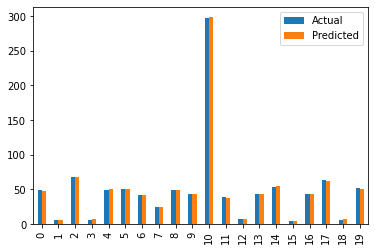

In [39]:
graph = data.head(20)
graph.plot(kind='bar')